# Machine Learning 2023/2024

## Third Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from statsmodels.api import OLS, add_constant
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (PowerTransformer)
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Loading and understanding the Dataset

In [2]:
unpickled_df = pd.read_pickle("drd2_data.pickle")
#unpickled_df

In [3]:
print(type(unpickled_df[0]))
unpickled_df[0].shape

<class 'numpy.ndarray'>


(7337, 2132)

Data is splitted upon loading

In [4]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

In [5]:
#for col in (col_names):
#    print("coluna: ", col)

In [6]:
print(X_train.shape)
#X_train

(7337, 2132)


In [7]:
#X_train.tofile('X_train.csv', sep = ',')

In [8]:
print(X_ivs.shape)
#X_ivs

(816, 2132)


In [9]:
print(y_train.shape)
#y_train

(7337,)


In [10]:
#cols_to_discard = []
#for col in range (X_train.shape[1]):
#    print("coluna: ", col_names[col])
#    proportion = (X_train[: col] == 0).mean() * 100
#    if proportion > 0:
#            print(f"Proportion of missing values in column { col }: { round(proportion, 2) }%")
#        cols_to_discard.append(col)

In [11]:
N,M=X_train.shape
N,M
v=np.hstack((y_train.reshape((N,1)), X_train))
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,0.654947,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649995,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.154947,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.616176,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.359725,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.002193,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,0.293481,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,0.596804,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Data Treatement

In [12]:
#powerscaler not ideal for this dataset since it deletes outliers and we believe that the outliers shouldn't be removed from this dataset
#scaler = PowerTransformer().fit(X_train)

sScaler = StandardScaler()
X_train_scaled = sScaler.fit_transform(X_train)
X_ivs_scaled = sScaler.transform(X_ivs)

In [13]:
#print(np.unique(X_train_scaled[: 1]))

In [14]:
#X_train_scaled.tofile('X_train_scaled.csv', sep = ',')

In [15]:
#Pode não fazer sentido fazer o scale dos dados cortados. Talvez faça mais sentido fazer o corte sobre os dados já "scaled"
#X_train_cut_scaled = sScaler.fit_transform(X_train_cut)
#X_ivs_cut_scaled = sScaler.transform(X_ivs_cut)

<h3>selecting features by droping the features with correlation score bellow 0.05 to the dependant variable

In [16]:
#new correlation matrix with scaled data
v_scaled=np.hstack((y_train.reshape((N,1)), X_train_scaled))
pd.DataFrame(v_scaled)

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,0.654947,0.609921,0.608648,1.098414,-0.081854,0.246156,-0.058057,1.908209,0.737657,0.614996,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
1,0.649995,-0.023790,-0.024513,-0.103427,-0.081854,0.413306,-0.058057,-0.243126,-0.038629,0.032423,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
2,0.154947,-0.453381,-0.454433,-0.343795,-0.477479,-0.589590,-0.508809,-0.601682,-0.349144,-0.355960,...,1.234467,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
3,0.616176,5.645607,5.644129,5.184672,7.039406,2.753396,7.153978,4.059544,5.783518,5.702803,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,5.029661,3.091413,5.116060
4,0.359725,-0.238802,-0.237426,-0.343795,-0.477479,-0.422441,-0.508809,-0.243126,-0.271515,-0.355960,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,0.201712,0.200698,0.136941,-0.477479,-0.088142,-0.508809,0.115430,0.116628,-0.122930,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
7333,0.002193,-1.048209,-1.049199,-0.824531,-0.477479,-0.589590,-0.508809,-0.960238,-0.970173,-0.822018,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,3.091413,-0.195463
7334,0.293481,0.439425,0.438883,-0.343795,-0.477479,0.580455,-0.508809,-0.243126,0.504771,0.770349,...,-0.810066,-0.195463,-0.179087,3.210153,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
7335,0.596804,-0.205564,-0.206229,-0.343795,0.313772,-0.255292,-0.058057,0.115430,-0.193886,-0.161769,...,1.234467,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463


In [17]:
pd.DataFrame(np.corrcoef(v_scaled.T))

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.160182,0.160216,0.130117,0.084939,0.151968,0.095929,0.126690,0.157545,0.165189,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.160182,1.000000,0.999998,0.919389,0.772557,0.888252,0.784495,0.856242,0.992766,0.973177,...,0.213406,0.019559,0.127229,0.117371,-0.017119,0.053576,0.212881,0.342831,0.173077,0.219727
2,0.160216,0.999998,1.000000,0.919128,0.772379,0.888072,0.784320,0.855980,0.992623,0.972956,...,0.213435,0.019583,0.127309,0.117351,-0.017201,0.053498,0.212889,0.342785,0.173016,0.219646
3,0.130117,0.919389,0.919128,1.000000,0.838103,0.863232,0.843652,0.931528,0.922469,0.905146,...,0.196534,-0.008557,0.095891,0.064926,-0.026235,0.043314,0.181134,0.332638,0.137266,0.205303
4,0.084939,0.772557,0.772379,0.838103,1.000000,0.704868,0.993448,0.653117,0.774714,0.769215,...,0.185163,-0.032325,0.083849,0.022735,-0.013150,0.045537,0.110449,0.409722,0.210139,0.231743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,0.053576,0.053498,0.043314,0.045537,0.036037,0.047958,0.038387,0.059813,0.061989,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.212881,0.212889,0.181134,0.110449,0.254921,0.115041,0.202605,0.213051,0.218212,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.342831,0.342785,0.332638,0.409722,0.276091,0.410854,0.233237,0.342548,0.342609,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,0.173077,0.173016,0.137266,0.210139,0.177572,0.216401,0.081396,0.184924,0.190152,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [18]:
corr_matrix = pd.DataFrame(np.corrcoef(v_scaled.T))

# Initialize an empty list to store line numbers and values
filtered_values_per_line = []

# Iterate through the DataFrame and store line numbers and values
#for i, row in enumerate(corr_matrix.values):
#    line_values = [(j, value) for j, value in enumerate(row) if abs(value) > 0. and abs(value) < 1]
#    if line_values:
#        filtered_values_per_line.append(line_values)

# Display the filtered values for each line
#for line_number, values in enumerate(filtered_values_per_line):
#    print(f"Line {line_number}: {values}")
   
for row, value in enumerate(corr_matrix.values[0, 1:]):
    if value > 0.05:
        line_values = (row, value)
        filtered_values_per_line.append(line_values)

#for values, line_number in enumerate(filtered_values_per_line):
    #print(f"Line {line_number}: {values}")

len(filtered_values_per_line)

374

In [19]:
# Initialize an empty list to store line numbers and values
filtered_values_per_line = []

for row, value in enumerate(corr_matrix.values[0, 1:]):
    if value < 0.05: #0.05 to have a total of 374 features
        line_values = (row, value)
        filtered_values_per_line.append(line_values)

features_to_remove = []
for values, line_number in enumerate(filtered_values_per_line):
    #print(f"Feature {line_number}: {values}")
    features_to_remove.append(line_number[0])

len(filtered_values_per_line)
#print (features_to_remove)

1758

<h4>New X-train with removed features

In [20]:
X_train_cut= np.delete(X_train_scaled, features_to_remove, 1)

N_cut,M_cut=X_train_cut.shape
X_train_cut.shape

(7337, 374)

In [21]:
X_ivs_cut= np.delete(X_ivs_scaled, features_to_remove, 1)

X_ivs_cut.shape

(816, 374)

In [22]:
#print(np.unique(X_train[: 1]))

<h3>Data Treatment redundant (ignore this section, to delete)

In [23]:
#powerscaler not ideal for this dataset since it deletes outliers and we believe that the outliers shouldn't be removed from this dataset
#scaler = PowerTransformer().fit(X_train)

#sScaler = StandardScaler()
#X_train_scaled = sScaler.fit_transform(X_train)
#X_ivs_scaled = sScaler.transform(X_ivs)

In [24]:
#print(np.unique(X_train_scaled[: 1]))

In [25]:
#X_train_scaled.tofile('X_train_scaled.csv', sep = ',')

In [26]:
#Pode não fazer sentido fazer o scale dos dados cortados. Talvez faça mais sentido fazer o corte sobre os dados já "scaled"
#X_train_cut_scaled = sScaler.fit_transform(X_train_cut)
#X_ivs_cut_scaled = sScaler.transform(X_ivs_cut)

<h3>Feature Selection

<h4>Stepwise fowards feature selection 

In [27]:
#To Discard. This approach of feature selection takes to long on big datasets (7000+, 300+)

#N,M=X_train_cut.shape

#using linear regression for sequential feature selection
#lmr=LinearRegression()
#sfs = SequentialFeatureSelector(lmr, n_features_to_select=50, n_jobs=16)
#sfs.fit(X_train_cut, y_train)

#get the relevant columns
#features=sfs.get_support()
#Features_selected =np.arange(M)[features]
#print("The features selected are columns: ", Features_selected)

#X_train_cut_sfs=sfs.transform(X_train_cut)
#X_test_cut_sfs=sfs.transform(X_ivs_cut)

<h4>RFs for feature selection

In [28]:
def rffeatureSelect(x_train, x_ivs, n_features, t):
    rfr=RandomForestRegressor(random_state=0, n_jobs=6) #n_jobs=8
    rfr.fit(x_train, y_train)
    #for i, imp in enumerate(rfr.feature_importances_):
    #    print("Feature", i, "Importance:", imp )
    
    sel = SelectFromModel(estimator=rfr, threshold= t) #Change the threshold! See what happens!
    sel.fit(x_train, y_train)
    
    #print("Importances: ", sel.estimator.feature_importances_)
    
    #print("Default threshold: ", sel.threshold_)
    
    features=sel.get_support()
    Features_selected =np.arange(n_features)[features]
    print("The features selected are columns: ", Features_selected,".\n Number of features:", len(Features_selected))
    
    X_train_rffs=sel.transform(x_train)
    X_test_rffs=sel.transform(x_ivs)
    return X_train_rffs, X_test_rffs
#naif_model_testingR(nX_train_cut, nX_test_cut, y_train, y_ivs) # y_ivs doesn't exist.

In [29]:
#takes around 5 min to execute
X_train_rffs, X_test_rffs = rffeatureSelect(X_train, X_ivs, M, .002)#.003

The features selected are columns:  [   0    1    2    3    4    5    6    8    9   11   12   16   22   23
   24   25   26   27   28   29   30   31   32   33   34   35   36   37
   38   39   40   41   42  216  246  287  316  336  348  353  362  364
  444  494  561  695  819  839  853  886  891  909  939  959  981  982
 1013 1054 1087 1147 1161 1167 1176 1285 1440 1454 1499 1527 1598 1667
 1687 1709 1841 1868 1921 1922 1968] .
 Number of features: 77


In [30]:
#takes around 5 min to execute
#Delete? probably not, since its possible to feature select in unscaled dataset, but it makes no sense to scale it after the feature selection is made.
X_train_scaled_rffs, X_test_scaled_rffs = rffeatureSelect(X_train_scaled, X_ivs_scaled, M, .002)#.003

The features selected are columns:  [   0    1    2    3    4    5    6    8    9   11   12   16   22   23
   24   25   26   27   28   29   30   31   32   33   34   35   36   37
   38   39   40   41   42  216  246  287  316  336  348  353  362  364
  444  494  561  819  839  853  886  891  909  939  959  981  982 1013
 1054 1087 1147 1161 1167 1176 1285 1440 1454 1499 1527 1598 1667 1687
 1709 1841 1868 1921 1922 1968] .
 Number of features: 76


In [31]:
X_train_cut_rffs, X_test_cut_rffs= rffeatureSelect(X_train_cut, X_ivs_cut, M_cut, .005)#.01

The features selected are columns:  [  0   1   3   4   5   6   8   9  11  16  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  50  68  74  78  79  90  92 102
 140 161 167 178 187 192 201 240 267 272 298 299 306 327 343] .
 Number of features: 51


<h4>Principal component analisys (PCA)

In [32]:
def pca(x_train, n_comps):
    pca = PCA(n_components=n_comps)
    pca.fit(x_train)
    tve=0
    for i, ve in enumerate(pca.explained_variance_ratio_):
        tve+=ve
        print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
    #print()
    #print("Actual Eigenvalues:", pca.singular_values_)
    #for i,comp in enumerate(pca.components_):
    #    print("PC",i, "-->", comp)    
    return pca

def kpca(x_train, n_comps):
    kpca = KernelPCA(n_components=n_comps, kernel='rbf')#, gamma=3)
    kpca.fit(x_train)
    X_train_kpca = kpca.transform(x_train)
    return X_train_kpca

In [33]:
pca1 = pca(X_train, 50) 
X_train_pca = pca1.transform(X_train)
#X_test_pca=pca.transform(X_ivs)

PC0 - Variance explained:  0.9869 - Total Variance:  0.9869
PC1 - Variance explained:  0.0102 - Total Variance:  0.9971
PC2 - Variance explained:  0.0014 - Total Variance:  0.9985
PC3 - Variance explained:  0.0002 - Total Variance:  0.9988
PC4 - Variance explained:  0.0001 - Total Variance:  0.9989
PC5 - Variance explained:  0.0001 - Total Variance:  0.9990
PC6 - Variance explained:  0.0001 - Total Variance:  0.9990
PC7 - Variance explained:  0.0000 - Total Variance:  0.9991
PC8 - Variance explained:  0.0000 - Total Variance:  0.9991
PC9 - Variance explained:  0.0000 - Total Variance:  0.9991
PC10 - Variance explained:  0.0000 - Total Variance:  0.9992
PC11 - Variance explained:  0.0000 - Total Variance:  0.9992
PC12 - Variance explained:  0.0000 - Total Variance:  0.9992
PC13 - Variance explained:  0.0000 - Total Variance:  0.9992
PC14 - Variance explained:  0.0000 - Total Variance:  0.9992
PC15 - Variance explained:  0.0000 - Total Variance:  0.9992
PC16 - Variance explained:  0.0000

In [34]:
X_train_kpca =kpca(X_train,50)

In [35]:
pca_scaled = pca(X_train_scaled, 250) 
X_train_scaled_pca = pca_scaled.transform(X_train_scaled)
#X_test_scaled_pca=pca_scaled.transform(X_ivs_scaled)

PC0 - Variance explained:  0.0259 - Total Variance:  0.0259
PC1 - Variance explained:  0.0131 - Total Variance:  0.0389
PC2 - Variance explained:  0.0126 - Total Variance:  0.0515
PC3 - Variance explained:  0.0116 - Total Variance:  0.0631
PC4 - Variance explained:  0.0099 - Total Variance:  0.0730
PC5 - Variance explained:  0.0077 - Total Variance:  0.0807
PC6 - Variance explained:  0.0074 - Total Variance:  0.0881
PC7 - Variance explained:  0.0068 - Total Variance:  0.0949
PC8 - Variance explained:  0.0066 - Total Variance:  0.1016
PC9 - Variance explained:  0.0064 - Total Variance:  0.1079
PC10 - Variance explained:  0.0062 - Total Variance:  0.1141
PC11 - Variance explained:  0.0059 - Total Variance:  0.1200
PC12 - Variance explained:  0.0057 - Total Variance:  0.1258
PC13 - Variance explained:  0.0054 - Total Variance:  0.1312
PC14 - Variance explained:  0.0052 - Total Variance:  0.1364
PC15 - Variance explained:  0.0051 - Total Variance:  0.1415
PC16 - Variance explained:  0.0051

In [36]:
X_train_scaled_kpca =kpca(X_train_scaled,50)

In [37]:
pca_cut = pca(X_train_cut, 150)
X_train_cut_pca = pca_cut.transform(X_train_cut)
#X_test_cut_pca=pca_cut.transform(X_ivs_cut)

PC0 - Variance explained:  0.0862 - Total Variance:  0.0862
PC1 - Variance explained:  0.0406 - Total Variance:  0.1268
PC2 - Variance explained:  0.0323 - Total Variance:  0.1591
PC3 - Variance explained:  0.0293 - Total Variance:  0.1884
PC4 - Variance explained:  0.0272 - Total Variance:  0.2156
PC5 - Variance explained:  0.0256 - Total Variance:  0.2412
PC6 - Variance explained:  0.0245 - Total Variance:  0.2657
PC7 - Variance explained:  0.0191 - Total Variance:  0.2848
PC8 - Variance explained:  0.0169 - Total Variance:  0.3017
PC9 - Variance explained:  0.0163 - Total Variance:  0.3180
PC10 - Variance explained:  0.0137 - Total Variance:  0.3317
PC11 - Variance explained:  0.0133 - Total Variance:  0.3450
PC12 - Variance explained:  0.0124 - Total Variance:  0.3573
PC13 - Variance explained:  0.0112 - Total Variance:  0.3685
PC14 - Variance explained:  0.0109 - Total Variance:  0.3794
PC15 - Variance explained:  0.0107 - Total Variance:  0.3901
PC16 - Variance explained:  0.0099

In [38]:
X_train_cut_kpca =kpca(X_train_cut,70)

In [39]:
pca_rffs = pca(X_train_rffs, 50)
X_train_rffs_pca = pca_rffs.transform(X_train_rffs)
#X_test_rffs_pca=pca_rffs.transform(X_test_rffs)

PC0 - Variance explained:  0.9878 - Total Variance:  0.9878
PC1 - Variance explained:  0.0102 - Total Variance:  0.9980
PC2 - Variance explained:  0.0014 - Total Variance:  0.9994
PC3 - Variance explained:  0.0002 - Total Variance:  0.9996
PC4 - Variance explained:  0.0001 - Total Variance:  0.9998
PC5 - Variance explained:  0.0001 - Total Variance:  0.9998
PC6 - Variance explained:  0.0000 - Total Variance:  0.9999
PC7 - Variance explained:  0.0000 - Total Variance:  0.9999
PC8 - Variance explained:  0.0000 - Total Variance:  0.9999
PC9 - Variance explained:  0.0000 - Total Variance:  0.9999
PC10 - Variance explained:  0.0000 - Total Variance:  0.9999
PC11 - Variance explained:  0.0000 - Total Variance:  0.9999
PC12 - Variance explained:  0.0000 - Total Variance:  0.9999
PC13 - Variance explained:  0.0000 - Total Variance:  1.0000
PC14 - Variance explained:  0.0000 - Total Variance:  1.0000
PC15 - Variance explained:  0.0000 - Total Variance:  1.0000
PC16 - Variance explained:  0.0000

In [40]:
X_train_rffs_kpca =kpca(X_train_rffs,50)

In [41]:
#pca_scaled_rffs
pca_scaled_rffs = pca(X_train_scaled_rffs, 40)
X_train_scaled_rffs_pca = pca_scaled_rffs.transform(X_train_scaled_rffs)
#X_test_scaled_rffs_pca = pca_scaled_rffs.transform(X_test_scaled_rffs)

PC0 - Variance explained:  0.3320 - Total Variance:  0.3320
PC1 - Variance explained:  0.0494 - Total Variance:  0.3814
PC2 - Variance explained:  0.0474 - Total Variance:  0.4287
PC3 - Variance explained:  0.0409 - Total Variance:  0.4696
PC4 - Variance explained:  0.0334 - Total Variance:  0.5030
PC5 - Variance explained:  0.0310 - Total Variance:  0.5341
PC6 - Variance explained:  0.0265 - Total Variance:  0.5606
PC7 - Variance explained:  0.0240 - Total Variance:  0.5845
PC8 - Variance explained:  0.0218 - Total Variance:  0.6063
PC9 - Variance explained:  0.0204 - Total Variance:  0.6267
PC10 - Variance explained:  0.0195 - Total Variance:  0.6462
PC11 - Variance explained:  0.0184 - Total Variance:  0.6647
PC12 - Variance explained:  0.0167 - Total Variance:  0.6814
PC13 - Variance explained:  0.0166 - Total Variance:  0.6980
PC14 - Variance explained:  0.0158 - Total Variance:  0.7138
PC15 - Variance explained:  0.0149 - Total Variance:  0.7287
PC16 - Variance explained:  0.0141

In [42]:
X_train_scaled_rffs_kpca = kpca(X_train_scaled_rffs,50)

In [43]:
pca_cut_rffs = pca(X_train_cut_rffs, 5)
X_train_cut_rffs_pca=pca_cut_rffs.transform(X_train_cut_rffs)
#X_test_cut_rffs_pca=pca_cut.transform(X_test_cut_rffs)

PC0 - Variance explained:  0.4475 - Total Variance:  0.4475
PC1 - Variance explained:  0.0565 - Total Variance:  0.5040
PC2 - Variance explained:  0.0497 - Total Variance:  0.5537
PC3 - Variance explained:  0.0418 - Total Variance:  0.5955
PC4 - Variance explained:  0.0317 - Total Variance:  0.6272


In [44]:
X_train_cut_rffs_kpca = kpca(X_train_cut_rffs,5)

<h3>Cross-validation. Evaluation of the (models) and data configurations.

In [99]:
def printAvalStat(truth, preds):
    avalStats = []
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")
    avalStats.append(explained_variance_score(truth, preds))
    avalStats.append(mean_squared_error(truth, preds, squared=False))
    avalStats.append(pearsonr(truth, preds))
    #avalStats.append( %(corr,pval) )
    return avalStats

    

<h4>N-Fold Cross validation

In [46]:
def nfold_valid(X_train_Valids):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]

        #mdl = DecisionTreeRegressor()#max_depth = 5)
        mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 8, n_jobs=6)
        mdl.fit(X_train_nfold, y_train_nfold)
        preds = mdl.predict(X_ivs_nfold)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_ivs_nfold
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    printAvalStat(TRUTH_nfold, PREDS_nfold)

#print("N-fold cross validation of nXf_train, after sequencial reduction feature selection")
#nfold_valid(nXf_train)





In [47]:
#first unchanged data evaluations
print("N-fold cross validation of X_train")
nfold_valid(X_train)
print("N-fold cross validation of X_train_scaled")
nfold_valid(X_train_scaled)

#manually cut features data evaluations
print("N-fold cross validation of X_train_cut(already scaled!)")
nfold_valid(X_train_cut)

#feature selected data evaluations
print("N-fold cross validation of X_train_rffs")
nfold_valid(X_train_rffs)
print("N-fold cross validation of X_train_scaled_rffs")
nfold_valid(X_train_scaled_rffs)

#cut x feature selected data evaluation
print("N-fold cross validation of X_train_cut_rffs(already scaled!)")
nfold_valid(X_train_cut_rffs)

N-fold cross validation of X_train
The RVE is:  0.4306622630357595
The rmse is:  0.2087354179051696
The Correlation Score is: 0.6606 (p-value=0.000000e+00)
The Maximum Error is:  0.8645408990344696
The Mean Absolute Error is: 0.165311491822563 

N-fold cross validation of X_train_scaled
The RVE is:  0.43079787092361854
The rmse is:  0.20871057962911607
The Correlation Score is: 0.6607 (p-value=0.000000e+00)
The Maximum Error is:  0.8645408990344696
The Mean Absolute Error is: 0.16528339261716604 

N-fold cross validation of X_train_cut(already scaled!)
The RVE is:  0.4262619972524191
The rmse is:  0.20955020213931275
The Correlation Score is: 0.6565 (p-value=0.000000e+00)
The Maximum Error is:  0.8327437900923893
The Mean Absolute Error is: 0.16607190021223064 

N-fold cross validation of X_train_rffs
The RVE is:  0.41724130429386386
The rmse is:  0.21118127103081402
The Correlation Score is: 0.6488 (p-value=0.000000e+00)
The Maximum Error is:  0.8811235836490621
The Mean Absolute Erro

In [48]:
#Pca evaluations
print("N-fold cross validation of X_train_pca")
nfold_valid(X_train_pca)
print("N-fold cross validation of X_train_scaled_pca")
nfold_valid(X_train_scaled_pca)

print("N-fold cross validation of X_train_cut_pca(already scaled!)")
nfold_valid(X_train_cut_pca)

print("N-fold cross validation of X_train_rffs_pca")
nfold_valid(X_train_rffs_pca)
print("N-fold cross validation of X_train_scaled_rffs_pca")
nfold_valid(X_train_scaled_rffs_pca)

print("N-fold cross validation of X_train_cut_rffs_pca(already scaled!)")
nfold_valid(X_train_cut_rffs_pca)

N-fold cross validation of X_train_pca
The RVE is:  0.39299224798994303
The rmse is:  0.21553220099737946
The Correlation Score is: 0.6356 (p-value=0.000000e+00)
The Maximum Error is:  0.8392410576248104
The Mean Absolute Error is: 0.17040092876339938 

N-fold cross validation of X_train_scaled_pca
The RVE is:  0.424286725886451
The rmse is:  0.2099055027123239
The Correlation Score is: 0.6571 (p-value=0.000000e+00)
The Maximum Error is:  0.7692115092281582
The Mean Absolute Error is: 0.16682860882396786 

N-fold cross validation of X_train_cut_pca(already scaled!)
The RVE is:  0.42787835988692025
The rmse is:  0.20927293742785102
The Correlation Score is: 0.6601 (p-value=0.000000e+00)
The Maximum Error is:  0.8038212749178815
The Mean Absolute Error is: 0.1665195275828643 

N-fold cross validation of X_train_rffs_pca
The RVE is:  0.37750178296084635
The rmse is:  0.21826608766673183
The Correlation Score is: 0.6201 (p-value=0.000000e+00)
The Maximum Error is:  0.8242641145047169
The M

In [49]:
#Kpca evaluations
print("N-fold cross validation of X_train_kpca")
nfold_valid(X_train_kpca)
print("N-fold cross validation of X_train_scaled_kpca")
nfold_valid(X_train_scaled_kpca)

print("N-fold cross validation of X_train_cut_kpca(already scaled!)")
nfold_valid(X_train_cut_kpca)

print("N-fold cross validation of X_train_rffs_kpca")
nfold_valid(X_train_rffs_kpca)
print("N-fold cross validation of X_train_scaled_rffs_kpca")
nfold_valid(X_train_scaled_rffs_kpca)

print("N-fold cross validation of X_train_cut_rffs_kpca(already scaled!)")
nfold_valid(X_train_cut_rffs_kpca)

N-fold cross validation of X_train_kpca
The RVE is:  0.14801158945012416
The rmse is:  0.25535241202946546
The Correlation Score is: 0.3848 (p-value=1.571161e-257)
The Maximum Error is:  0.8272060695269964
The Mean Absolute Error is: 0.20672956807658874 

N-fold cross validation of X_train_scaled_kpca
The RVE is:  0.4036438487075611
The rmse is:  0.21363234368750544
The Correlation Score is: 0.6391 (p-value=0.000000e+00)
The Maximum Error is:  0.7655713324708981
The Mean Absolute Error is: 0.16811024817903172 

N-fold cross validation of X_train_cut_kpca(already scaled!)
The RVE is:  0.46641610444987747
The rmse is:  0.20208862280966738
The Correlation Score is: 0.6835 (p-value=0.000000e+00)
The Maximum Error is:  0.8191539898850071
The Mean Absolute Error is: 0.15917432346466567 

N-fold cross validation of X_train_rffs_kpca
The RVE is:  0.11273638118713725
The rmse is:  0.260578449409946
The Correlation Score is: 0.3358 (p-value=8.420050e-193)
The Maximum Error is:  0.863568506372470

<h5>
Com estes resultados concluímos que o data tretment que efetuámos não afeta consideravelmente a qualidade dos modelos resultantes.
<br>
De salientar que os modelos resultantes dos dados manualmente cortados, que resultou numa redução de features de 2000+ para 377, tem resultados muito semelhantes aos modelos que usam todas as 2000+ features.
<br>
Por isso achamos que só o uso de mais e diferentes modelos para além de random forest é que poderemos melhorar o resultado das previsões.
</h5>

#### Daqui para a frente escolhemos o dataset X_train_scaled_rffs_pca por ter melhor ratio de scores/ nº features usadas

In [94]:
def nfold_valid_mt(X_train_Valids):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]
    
    gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
    Cs = [1, 10, 100, 1e3, 1e4, 1e5]
    param_grid = {"gamma": gammas, "C": Cs}
    
    #define the model and do the grid search
    svr = SVR()
    gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring="explained_variance")
    mdl = gs.fit(X_train_Valids, y_train)
    preds = mdl.predict(X_ivs_nfold)
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_ivs_nfold
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    printAvalStat(TRUTH_nfold, PREDS_nfold)

In [51]:
#nfold_valid_mt(X_train_cut_kpca)

<h3>New Models</h3>

In [95]:
def nfold_evaluate(mdl ,X_train_Valids):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]

        #mdl = DecisionTreeRegressor()#max_depth = 5)
        mdl.fit(X_train_nfold, y_train_nfold)
        preds = mdl.predict(X_ivs_nfold)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_ivs_nfold
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    return printAvalStat(TRUTH_nfold, PREDS_nfold)

In [106]:
RFR_mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 8, n_jobs=6)
LR_mdl = LinearRegression()
Ridge_mdl = Ridge(alpha=1, max_iter=9999999)#10
Lasso_mdl = Lasso(alpha=1, max_iter=9999999)#10
KNN_mdl =KNeighborsRegressor()
SVR_mdl =SVR()
XGB_mdl = XGBRegressor()
ABR_mdl = AdaBoostRegressor(n_estimators=10) #n_estimators=10
GBR_mdl = GradientBoostingRegressor(n_estimators=10, learning_rate=1.0, random_state=0) #n_estimators=10

In [ ]:
#Set de controlo
print("Set de controlo")
print("result of linear regression model on the X_train_scaled dataset")
LR_ce = nfold_evaluate(LR_mdl ,X_train_scaled)
print("result of Ridge model on the X_train_scaled dataset")
Ridge_ce= nfold_evaluate(Ridge_mdl ,X_train_scaled)
print("result of Lasso regression model on the X_train_scaled dataset")
Lasso_ce=nfold_evaluate(Lasso_mdl ,X_train_scaled)
print("result of K-means regression model on the X_train_scaled dataset")
KNN_ce=nfold_evaluate(KNN_mdl ,X_train_scaled)
print("result of support vector regressor model on the X_train_scaled dataset")
SVR_ce=nfold_evaluate(SVR_mdl ,X_train_scaled)
print("result of XGBoost regression model on the X_train_scaled dataset")
XGB_ce=nfold_evaluate(XGB_mdl ,X_train_scaled)
print("result of AdaBoost regression model on the X_train_scaled dataset")
ABR_ce=nfold_evaluate(ABR_mdl ,X_train_scaled)
print("result of GradientBoost regression model on the X_train_scaled dataset")
GBR_ce=nfold_evaluate(GBR_mdl ,X_train_scaled)

In [107]:
#Set para testing do X_train_scaled_rffs_pca
print("result of linear regression model on the X_train_cut_pca dataset")
LR_me = nfold_evaluate(LR_mdl ,X_train_cut_pca)
print("result of Ridge model on the X_train_cut_pca dataset")
Ridge_me = nfold_evaluate(Ridge_mdl ,X_train_cut_pca)
print("result of Lasso regression model on the X_train_cut_pca dataset")
Lasso_me =nfold_evaluate(Lasso_mdl ,X_train_cut_pca)
print("result of K-means regression model on the X_train_cut_pca dataset")
KNN_me =nfold_evaluate(KNN_mdl ,X_train_cut_pca)
print("result of support vector regressor model on the X_train_cut_pca dataset")
SVR_me =nfold_evaluate(SVR_mdl ,X_train_cut_pca)
print("result of XGBoost regression model on the X_train_cut_pca dataset")
XGB_me =nfold_evaluate(XGB_mdl ,X_train_cut_pca)
print("result of AdaBoost regression model on the X_train_cut_pca dataset")
ABR_me =nfold_evaluate(ABR_mdl ,X_train_cut_pca)
print("result of GradientBoost regression model on the X_train_cut_pca dataset")
GBR_me =nfold_evaluate(GBR_mdl ,X_train_cut_pca)

result of linear regression model on the X_train_cut_pca dataset
The RVE is:  0.43377154744510427
The rmse is:  0.20816492874850623
The Correlation Score is: 0.6590 (p-value=0.000000e+00)
The Maximum Error is:  0.8347293567988678
The Mean Absolute Error is: 0.16525519780453973 

result of Ridge model on the X_train_cut_pca dataset
The RVE is:  0.4337769251890182
The rmse is:  0.2081639399134176
The Correlation Score is: 0.6590 (p-value=0.000000e+00)
The Maximum Error is:  0.8347123914044519
The Mean Absolute Error is: 0.1652550531876235 

result of Lasso regression model on the X_train_cut_pca dataset
The RVE is:  -0.0001864913956102221
The rmse is:  0.2766632727709075
The Correlation Score is: -0.0182 (p-value=1.189339e-01)
The Maximum Error is:  0.613232559385074
The Mean Absolute Error is: 0.22794516065455514 

result of K-means regression model on the X_train_cut_pca dataset
The RVE is:  0.5723094714809536
The rmse is:  0.1816170382403425
The Correlation Score is: 0.7588 (p-value=0

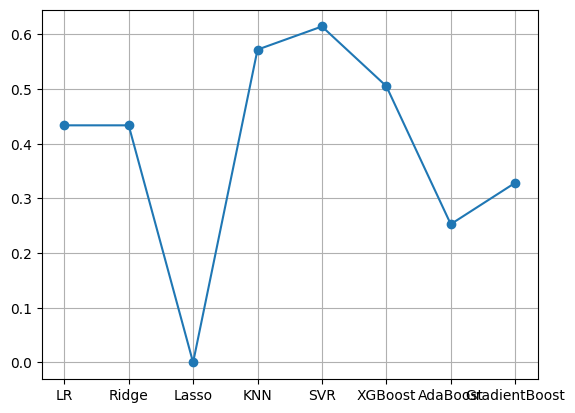

In [110]:
imputers = ["LR", "Ridge","Lasso", "KNN", "SVR", "XGBoost", "AdaBoost", "GradientBoost"]
RVEs = [LR_me[0], Ridge_me[0], Lasso_me[0], KNN_me[0], SVR_me[0], XGB_me[0], ABR_me[0], GBR_me[0]]

plt.plot(imputers, RVEs, marker = "o")
plt.grid()
plt.show()

In [83]:
SVR_mdl2 = SVR(kernel= "rbf", gamma = 'scale')
print("result of support vector regressor model on the X_train_cut_pca dataset")
nfold_evaluate(SVR_mdl2 ,X_train_cut_pca)

result of support vector regressor model on the X_train_cut_pca dataset
The RVE is:  0.6146736454782425
The rmse is:  0.1717218120943494
The Correlation Score is: 0.7844 (p-value=0.000000e+00)
The Maximum Error is:  0.8878367845582482
The Mean Absolute Error is: 0.1315740483253072 



<h4>Leave-one-out cross validation

In [ ]:
def LeaveOneOut_val(X_train_Valids):
    loo = LeaveOneOut()
    loo.get_n_splits(X_train_Valids)

    TRUTH_loo=[]
    PREDS_loo=[]

    for train_index, test_index in loo.split(X_train_Valids):
        X_train_loo, X_test_loo = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_loo, y_test_loo = y_train[train_index], y_train[test_index]

        mdl = DecisionTreeRegressor()#max_depth = 5)
        mdl.fit(X_train_loo, y_train_loo)
        pred = mdl.predict(X_test_loo)
        PREDS_loo.append(pred)
        TRUTH_loo.append(y_test_loo)

    printAvalStat(TRUTH_nfold, PREDS_nfold)
        
print("Leave-one-out cross validation of X_train")
LeaveOneOut_val(X_train)
print("Leave-one-out cross validation of nX_train, after PCA")
LeaveOneOut_val(nX_train)
#print("Leave-one-out cross validation of nXf_train, after sequencial reduction feature selection")
#LeaveOneOut_val(nXf_train)

In [ ]:
#gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
#Cs = [1, 10, 100, 1e3, 1e4, 1e5]
#param_grid = {"gamma": gammas, "C": Cs}

#svr = SVR()
#gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring="explained_variance")
#gs=gs.fit(X_train, y_train)

#res = pd.DataFrame(gs.cv_results_)
#res = res.sort_values(by=["rank_test_score"])

<h4> Random Forest Regressor 

In [ ]:
def DisplayRegResults(y_test, preds):
    print("RVE: %7.4f"  % explained_variance_score(y_test, preds))
    print("rmse: %7.4f" % mean_squared_error(y_test, preds, squared=False))

In [ ]:
rf = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3)
rf.fit(X_train_scaled, y_train)
preds=rf.predict(X_ivs_scaled)

DisplayRegResults(y_test, preds)

<h3>Objective:<br> Produce the best regression model for y_ivs (Dependent Variable)</h3>

Decision tree Regression model

In [ ]:
dmdl = DecisionTreeRegressor(max_depth=5)
dmdl.fit(X_train, y_train)

dtr_preds=dmdl.predict(X_test)

#explained_variance_score(y_test, dtr_preds)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dmdl, filled=True)#, feature_names= df.columns)
plt.show()

In [ ]:
rmses_i = []
rmses_j = []

#def statGraph()
for i in range(1, 11):
    dmdl_i = DecisionTreeRegressor(max_depth=i)
    dmdl_i.fit(X_train, y_train)
    
    preds_i=dmdl_i.predict(X_test)
    #= explained_variance_score(y_test, preds)
    rmses_i.append(mean_squared_error(y_test, preds_i, squared=False))
    
for i in range(1, 41):
    dmdl_j = DecisionTreeRegressor(max_depth=5, min_samples_leaf= i)
    dmdl_j.fit(X_train, y_train)
    
    preds_j=dmdl_j.predict(X_test)
    #= explained_variance_score(y_test, preds)
    rmses_j.append(mean_squared_error(y_test, preds_j, squared=False))

plt.figure(figsize=(3,3))
plt.plot(range(1, 11), rmses_i)
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
plt.plot(range(1, 41), rmses_j)
plt.xlabel("min_samples_leaf")
plt.ylabel("rmse")
plt.grid()
plt.show()

Linear Regression model

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

lr_preds=reg.predict(X_test)

#explained_variance_score(y_test, lr_preds)

Alternative linear regression model using statusmodel implementation

In [ ]:
X_tr = add_constant(X_train)
reg2=OLS(y_train,X_tr, hasconst=12).fit()
reg2.summary()

#alr_preds= reg2.predict(X_test)

Regularized linear models

Ridge Regression model

In [ ]:
ridge = Ridge(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

ridge_preds=ridge.predict(X_test)

Lasso Regression model

In [ ]:
lasso = Lasso(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  lasso.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

lasso_preds= lasso.predict(X_test)

Gráficos

In [ ]:
def drawGraf(preds, title):
    plt.figure(figsize=(3,3))
    plt.scatter(preds, y_test)
    plt.plot((0, 150), (0,150), c="r")
    plt.grid()
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.title(title)
    plt.show()


#####  Gráfico linear regression #########
drawGraf(lr_preds, "Linear Regression")

#####  Gráfico decision tree regression #########
drawGraf(dtr_preds, "Decision Tree Regression")

#####  Gráfico ridge regression #########
drawGraf(ridge_preds, "Ridge Regression")

#####  Gráfico lasso regression #########
drawGraf(lasso_preds, "Lasso Regression")

In [ ]:
def printAvalStat(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

In [ ]:
###############   Métricas de avaliação de decision tree regression
print("Métricas de avaliação de decision tree regression:")
printAvalStat(y_test, dtr_preds)

###############   Métricas de avaliação de linear regression
print("Métricas de avaliação de linear regression:")
printAvalStat(y_test, lr_preds)

###############   Métricas de avaliação de ridge regression
print("Métricas de avaliação de ridge regression:")
printAvalStat(y_test, ridge_preds)

###############   Métricas de avaliação de lasso regression
print("Métricas de avaliação de lasso regression:")
printAvalStat(y_test, lasso_preds)